In [6]:
# CELDAS DE CÓDIGO INICIALES EN EL NOTEBOOK

import pandas as pd
import os # Necesario para manejar rutas de archivos

# 1. Rutas
RAW_PATH = '../data/raw/' # Saliendo de notebooks/ y entrando a data/raw/

# 2. Cargar los archivos .xlsx
df_clientes = pd.read_excel(os.path.join(RAW_PATH, 'clientes.xlsx'))
df_productos = pd.read_excel(os.path.join(RAW_PATH, 'productos.xlsx'))
df_ventas = pd.read_excel(os.path.join(RAW_PATH, 'ventas.xlsx'))
df_detalle = pd.read_excel(os.path.join(RAW_PATH, 'detalle_ventas.xlsx'))

In [7]:
# CELDAS PARA LA NORMALIZACIÓN Y LIMPIEZA DE DATOS

print("\n--- 2. INICIANDO NORMALIZACIÓN ---")

# 1. Normalización de df_ventas
# Eliminamos columnas redundantes (nombre_cliente y email)
df_ventas_clean = df_ventas.drop(columns=['nombre_cliente', 'email']).copy()

# 2. Normalización de df_detalle
# Eliminamos la columna redundante (nombre_producto)
df_detalle_clean = df_detalle.drop(columns=['nombre_producto']).copy()

# Las tablas de catálogo ya están normalizadas, solo las copiamos
df_clientes_clean = df_clientes.copy()
df_productos_clean = df_productos.copy()


# VERIFICACIÓN DE LIMPIEZA: Muestra las primeras 5 filas de la tabla de ventas limpia
# Las columnas 'nombre_cliente' y 'email' ya NO deben aparecer.
print("\n--- 2.1. VERIFICACIÓN DE df_ventas_clean ---")
print(df_ventas_clean.head())

# VERIFICACIÓN DE LIMPIEZA: Muestra las primeras 5 filas de la tabla de detalle limpia
# La columna 'nombre_producto' ya NO debe aparecer.
print("\n--- 2.2. VERIFICACIÓN DE df_detalle_clean ---")
print(df_detalle_clean.head())


--- 2. INICIANDO NORMALIZACIÓN ---

--- 2.1. VERIFICACIÓN DE df_ventas_clean ---
   id_venta      fecha  id_cliente     medio_pago
0         1 2024-06-19          62        tarjeta
1         2 2024-03-17          49             qr
2         3 2024-01-13          20        tarjeta
3         4 2024-02-27          36  transferencia
4         5 2024-06-11          56        tarjeta

--- 2.2. VERIFICACIÓN DE df_detalle_clean ---
   id_venta  id_producto  cantidad  precio_unitario  importe
0         1           90         1             2902     2902
1         2           82         5             2394    11970
2         2           39         5              469     2345
3         2           70         2             4061     8122
4         2           22         1             2069     2069


In [8]:
# CELDAS PARA GUARDAR LOS ARCHIVOS PROCESADOS

PROCESSED_PATH = '../data/processed/'
# 1. Aseguramos que la carpeta exista antes de intentar guardar
os.makedirs(PROCESSED_PATH, exist_ok=True)

# 2. Guardamos los DataFrames limpios con un sufijo '_proc'
df_clientes_clean.to_excel(os.path.join(PROCESSED_PATH, 'clientes_proc.xlsx'), index=False)
df_productos_clean.to_excel(os.path.join(PROCESSED_PATH, 'productos_proc.xlsx'), index=False)
df_ventas_clean.to_excel(os.path.join(PROCESSED_PATH, 'ventas_proc.xlsx'), index=False)
df_detalle_clean.to_excel(os.path.join(PROCESSED_PATH, 'detalle_ventas_proc.xlsx'), index=False)

# 3. VERIFICACIÓN FINAL: Confirma que el proceso de guardado terminó
print("\n--- 3. VERIFICACIÓN DE GUARDADO ---")
print(f"Archivos procesados guardados exitosamente en la carpeta {PROCESSED_PATH}")
print("¡El proceso de Normalización ha terminado!")


--- 3. VERIFICACIÓN DE GUARDADO ---
Archivos procesados guardados exitosamente en la carpeta ../data/processed/
¡El proceso de Normalización ha terminado!


In [9]:
# CELDAS PARA EL ANÁLISIS DE NEGOCIO

# 1. Unir Detalle con Ventas (para obtener el id_cliente)
# Esto nos da el importe y el id_cliente para cada línea de la venta.
df_analisis = pd.merge(
    df_detalle_clean[['id_venta', 'importe']], 
    df_ventas_clean[['id_venta', 'id_cliente']],
    on='id_venta',
    how='left'
)

# 2. Unir con Clientes (para obtener la ciudad)
# Ahora añadimos la ciudad a cada línea de venta.
df_analisis = pd.merge(
    df_analisis, 
    df_clientes_clean[['id_cliente', 'ciudad']],
    on='id_cliente',
    how='left'
)

# 3. Calcular el total de ventas (importe) por ciudad
ventas_por_ciudad = df_analisis.groupby('ciudad')['importe'].sum().sort_values(ascending=False)

# 4. VERIFICACIÓN Y RESULTADO: Muestra las ventas totales por ciudad
print("\n--- 4. VENTAS TOTALES POR CIUDAD ---")
print(ventas_por_ciudad)


--- 4. VENTAS TOTALES POR CIUDAD ---
ciudad
Rio Cuarto     792203
Alta Gracia    481504
Cordoba        481482
Carlos Paz     353852
Villa Maria    313350
Mendiolaza     229026
Name: importe, dtype: int64


Matplotlib is building the font cache; this may take a moment.



--- 6. INICIANDO ANÁLISIS POR CATEGORÍA ---

--- 6.1. VENTAS TOTALES POR CATEGORÍA ---
categoria
Limpieza     1436281
Alimentos    1215136
Name: importe, dtype: int64


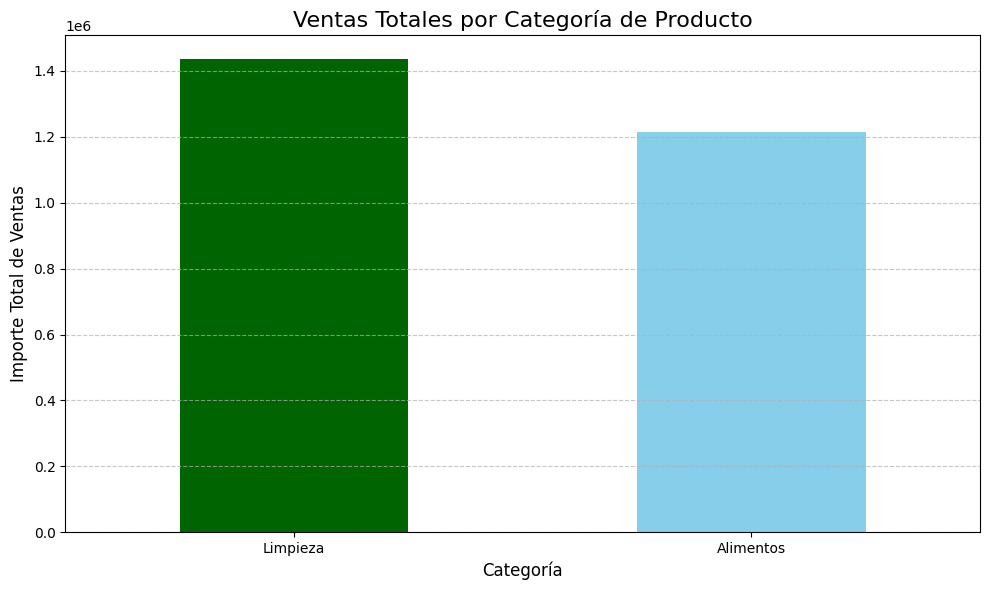

In [11]:
# CELDAS PARA EL ANÁLISIS DE VENTAS POR CATEGORÍA

import matplotlib.pyplot as plt

print("\n--- 6. INICIANDO ANÁLISIS POR CATEGORÍA ---")

# 1. Unir Detalle de Venta con Productos
# Necesitamos el 'importe' (del detalle) y la 'categoria' (del producto).
df_productos_ventas = pd.merge(
    df_detalle_clean,
    df_productos_clean[['id_producto', 'categoria']], # Solo necesitamos estas columnas
    on='id_producto',
    how='left'
)

# 2. Calcular el importe total por cada categoría
ventas_por_categoria = df_productos_ventas.groupby('categoria')['importe'].sum().sort_values(ascending=False)

# 3. VERIFICACIÓN Y RESULTADO: Muestra la Serie de resultados
print("\n--- 6.1. VENTAS TOTALES POR CATEGORÍA ---")
print(ventas_por_categoria)

# 4. Visualización
plt.figure(figsize=(10, 6))
ventas_por_categoria.plot(kind='bar', color=['darkgreen', 'skyblue', 'orange', 'red', 'purple'])

plt.title('Ventas Totales por Categoría de Producto', fontsize=16)
plt.ylabel('Importe Total de Ventas', fontsize=12)
plt.xlabel('Categoría', fontsize=12)
plt.xticks(rotation=0) # No es necesario rotar si hay pocas categorías
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



--- 7. INICIANDO ANÁLISIS DE MEDIOS DE PAGO ---

--- 7.1. VOLUMEN FINANCIERO POR MEDIO DE PAGO ---
medio_pago
efectivo         934819
qr               714280
transferencia    542219
tarjeta          460099
Name: importe_total_venta, dtype: int64


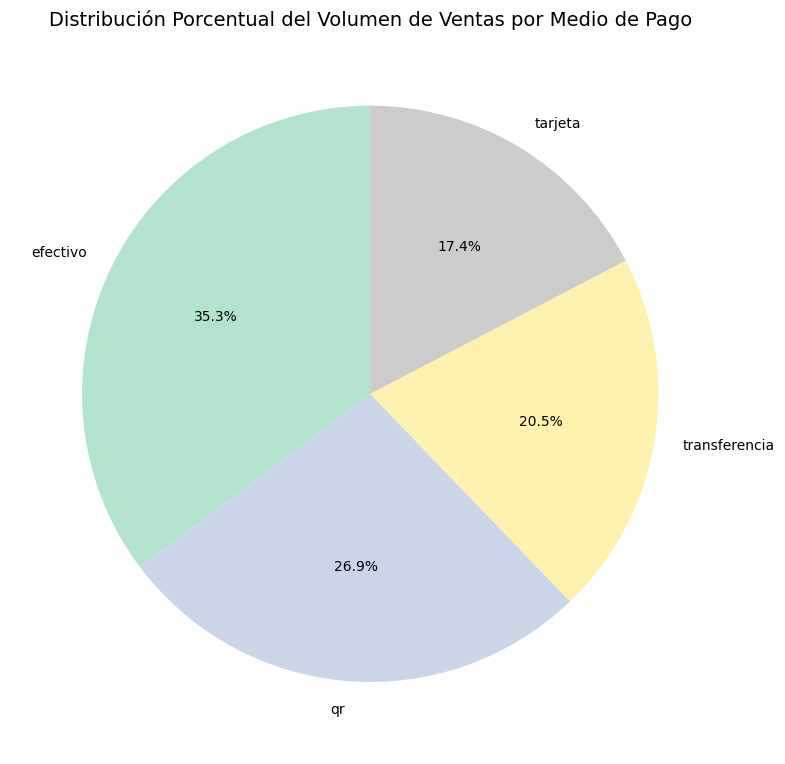

In [12]:
# CELDAS PARA EL ANÁLISIS DE MEDIOS DE PAGO

print("\n--- 7. INICIANDO ANÁLISIS DE MEDIOS DE PAGO ---")

# 1. Calcular el Importe Total por Venta (Agregando el detalle)
# Sumamos el importe de todas las líneas que componen una misma id_venta
ventas_agregadas = df_detalle_clean.groupby('id_venta')['importe'].sum().reset_index()
ventas_agregadas.rename(columns={'importe': 'importe_total_venta'}, inplace=True)

# 2. Unir las Ventas Agregadas con la tabla de Medios de Pago
# Usamos df_ventas_clean (que ya tiene 'medio_pago')
df_pagos = pd.merge(
    df_ventas_clean[['id_venta', 'medio_pago']], 
    ventas_agregadas,
    on='id_venta',
    how='left'
)

# 3. Calcular el volumen de ventas (importe) por cada medio de pago
volumen_por_pago = df_pagos.groupby('medio_pago')['importe_total_venta'].sum().sort_values(ascending=False)

# 4. VERIFICACIÓN Y RESULTADO: Muestra el volumen total por cada medio de pago
print("\n--- 7.1. VOLUMEN FINANCIERO POR MEDIO DE PAGO ---")
print(volumen_por_pago)

# 5. Visualización: Gráfico de Torta (Pie Chart) para ver las proporciones
plt.figure(figsize=(8, 8))
volumen_por_pago.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='Pastel2')

plt.title('Distribución Porcentual del Volumen de Ventas por Medio de Pago', fontsize=14)
plt.ylabel('') # Oculta la etiqueta del eje Y en gráficos de torta
plt.tight_layout()
plt.show()


--- 8. INICIANDO ANÁLISIS DE VALOR PROMEDIO POR CLIENTE (AOV) ---

--- 8.1. TOP 10 CLIENTES POR VALOR PROMEDIO DE TRANSACCIÓN (AOV) ---
    id_cliente  total_gasto  total_transacciones      AOV nombre_cliente
5            8        61503                    1  61503.0   Bruno Castro
26          34        57287                    1  57287.0   Bruno Castro
25          31        53828                    1  53828.0    Felipe Ruiz
24          30        43475                    1  43475.0   Ivana Medina
28          37        41537                    1  41537.0  Martina Perez
19          25        81830                    2  40915.0  Karina Castro
10          14        38570                    1  38570.0  Gael Martinez
59          88        36639                    1  36639.0  Felipe Castro
0            1        72448                    2  36224.0  Mariana Lopez
63          93        35760                    1  35760.0     Gael Rojas


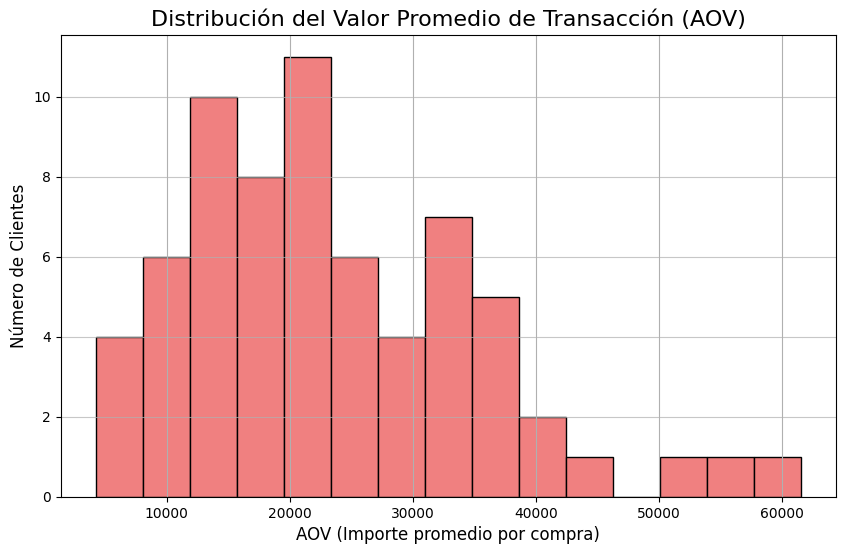

In [15]:
# CELDAS PARA EL CÁLCULO DEL VALOR PROMEDIO POR CLIENTE (AOV)

print("\n--- 8. INICIANDO ANÁLISIS DE VALOR PROMEDIO POR CLIENTE (AOV) ---")

# RECUERDA: Esta celda asume que ya ejecutaste el PASO 7
# y que tienes 'df_detalle_clean', 'df_ventas_clean', 'ventas_agregadas' disponibles.
# Además, asumimos que 'matplotlib.pyplot as plt' ya fue importado.

# --- INICIO DE LA CORRECCIÓN DE LA LÓGICA ---

# 1. ACTUALIZAR/CREAR df_pagos con 'id_cliente' y 'importe_total_venta'
# Este bloque de código debería estar AQUÍ para que df_pagos esté completo.
df_pagos_completo = pd.merge(
    # Usamos df_ventas_clean para obtener 'id_cliente' y 'medio_pago'
    df_ventas_clean[['id_venta', 'id_cliente', 'medio_pago']], 
    # Usamos las ventas agregadas (importe total por venta) del Paso 7
    ventas_agregadas,
    on='id_venta',
    how='left'
)

# 2. SELECCIONAR DATOS para AOV
# Ahora df_pagos_completo tiene 'id_cliente', por lo que esta línea funciona.
df_aov = df_pagos_completo[['id_venta', 'id_cliente', 'importe_total_venta']].copy()

# --- FIN DE LA CORRECCIÓN DE LA LÓGICA ---


# 3. Calcular las métricas por cliente:
aov_metricas = df_aov.groupby('id_cliente').agg(
    total_gasto=('importe_total_venta', 'sum'),
    total_transacciones=('id_venta', 'nunique') # Contamos las ventas únicas por cliente
).reset_index()

# 4. Calcular el AOV (Gasto Total / Transacciones Totales)
aov_metricas['AOV'] = aov_metricas['total_gasto'] / aov_metricas['total_transacciones']

# 5. Unir el AOV con los nombres de clientes para facilitar la lectura
df_aov_final = pd.merge(
    aov_metricas,
    df_clientes_clean[['id_cliente', 'nombre_cliente']],
    on='id_cliente',
    how='left'
)

# 6. VERIFICACIÓN Y RESULTADO: Muestra los 10 clientes con el AOV más alto
print("\n--- 8.1. TOP 10 CLIENTES POR VALOR PROMEDIO DE TRANSACCIÓN (AOV) ---")
print(df_aov_final.sort_values(by='AOV', ascending=False).head(10))

# 7. Visualización: Histograma del AOV para entender la distribución
plt.figure(figsize=(10, 6))
df_aov_final['AOV'].hist(bins=15, edgecolor='black', color='lightcoral')

plt.title('Distribución del Valor Promedio de Transacción (AOV)', fontsize=16)
plt.xlabel('AOV (Importe promedio por compra)', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)
plt.grid(axis='y', alpha=0.7)
plt.show()